# 11-experiment-three-cogsci

## Analysis

In [2]:
# Analytical Tools
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# General Utilities
import itertools
import json
import pprint

# Custom Utilities
import utilities.plotting as plotting
import utilities.describe as describe

# Some settings
log = pprint.pprint
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.mode.chained_assignment = None

### Import Data & Define Constants

In [3]:
GROUPS = 3
QUESTIONS = 4
JUDGMENTS = 4
SCORE_THRESHOLD = 240.9

data = pd.read_pickle('data/responses.pkl')
data.head()

,id,consent,attention,g0_q0_score,g0_q0_index,g0_q0_j0,g0_q0_j1,g0_q0_j2,g0_q0_j3,g0_q1_score,...,g2_q2_j0,g2_q2_j1,g2_q2_j2,g2_q2_j3,g2_q3_score,g2_q3_index,g2_q3_j0,g2_q3_j1,g2_q3_j2,g2_q3_j3
0,c3l44ptjm8gwybzu7l50glec089buutn,1,1,25,20,4,4,5,3,33,...,3,4,4,6,2404,14,4,3,5,3
1,ssbqs437srxmda94319o8dj70afva4zo,1,1,33,22,5,2,3,2,18,...,1,3,2,2,2404,38,4,2,2,2
2,lrrjk5ftnpf2hhab51ztzrafocpt0ah3,1,1,14,37,5,1,5,4,48,...,3,0,1,1,2385,17,4,2,3,3
3,zak0ozs6f2cxxeulwryc2puypfsk4coe,1,1,31,8,1,2,1,1,11,...,1,3,1,1,2407,7,1,2,1,1
4,pkgqdho721m55cg70rxef9fqkr03pg5q,1,1,24,0,4,0,4,3,32,...,3,0,2,2,2395,13,4,0,4,2


### Analysis

In [4]:
for g_num in range(GROUPS):
    for j_num in range(JUDGMENTS):
        headings = []
        for q_num in range(QUESTIONS):
            headings.append('g{}_q{}_j{}'.format(g_num, q_num, j_num))
        
        rating_mean = data[headings].mean(axis=1)
        data['g{}_j{}_mean'.format(g_num, j_num)] = rating_mean

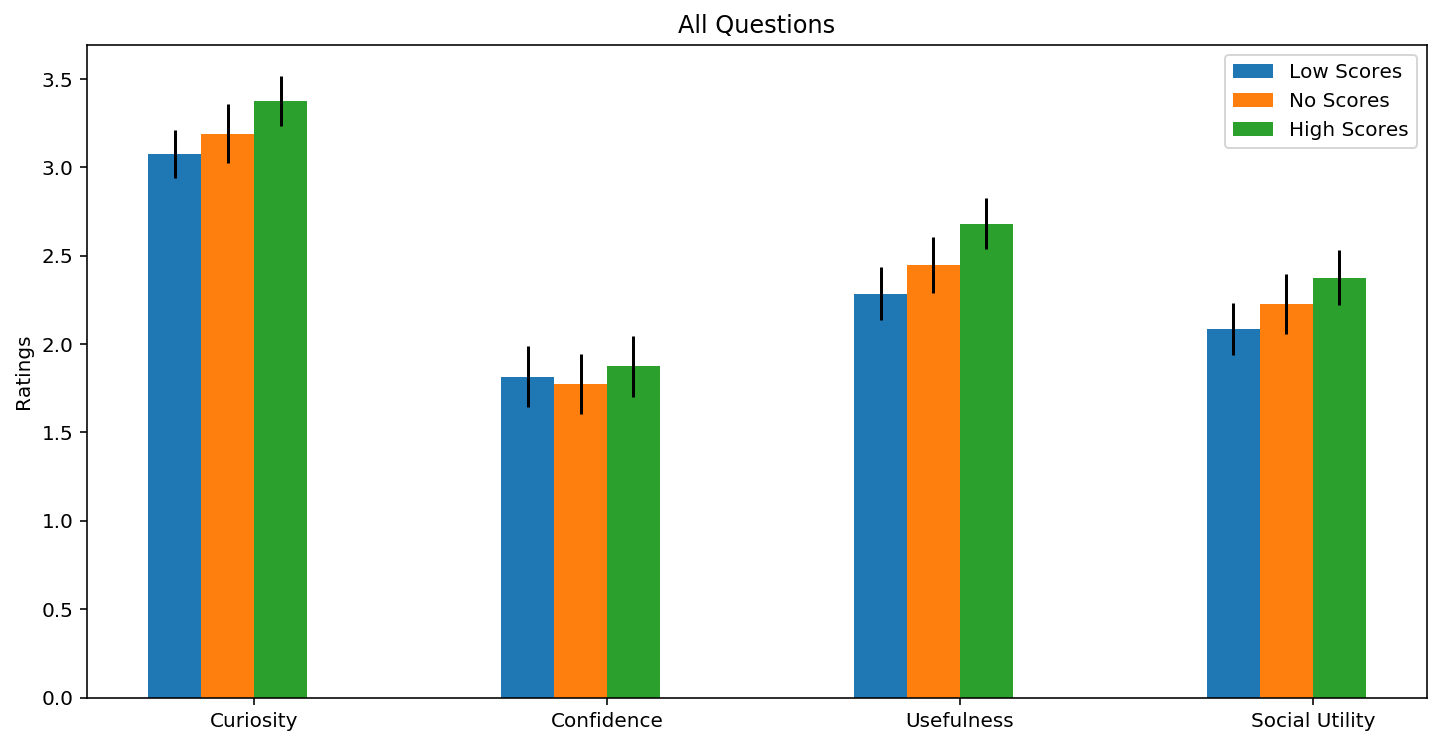

In [5]:
PLOTTING_OPTIONS = {
    'ylabel': 'Ratings',
    'ticks': ['Curiosity', 'Confidence', 'Usefulness','Social Utility'],
    'legend': ['Low Scores', 'No Scores', 'High Scores'],
    'title': 'All Questions',
    'size': (12, 6)
}

g0_means, g0_errs = [], []
g1_means, g1_errs = [], []
g2_means, g2_errs = [], []

for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g1_values = data['g1_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    g0_means.append(g0_values.mean())
    g1_means.append(g1_values.mean())
    g2_means.append(g2_values.mean())
    g0_errs.append(stats.sem(g0_values))
    g1_errs.append(stats.sem(g1_values))
    g2_errs.append(stats.sem(g2_values))
    
plotting.plot_triple_bar(g0_means, g0_errs, g1_means, g1_errs, 
                         g2_means, g2_errs, **PLOTTING_OPTIONS)

In [6]:
print('Low & High')
for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))
print()
print('Low & None')
for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g2_values = data['g1_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))
print()
print('None & High')
for j_num in range(JUDGMENTS):
    g0_values = data['g1_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))

Low & High
Curiosity: t = -2.54, p = 0.013, Δ = 0.299 (1 greater)
Confidence: t = -0.531, p = 0.597, Δ = 0.0584 (1 greater)
Usefulness: t = -3.26, p = 0.00167, Δ = 0.396 (1 greater)
Social Utility: t = -3.03, p = 0.00338, Δ = 0.292 (1 greater)

Low & None
Curiosity: t = -0.918, p = 0.361, Δ = 0.117 (1 greater)
Confidence: t = 0.407, p = 0.685, Δ = -0.039 (0 greater)
Usefulness: t = -1.31, p = 0.193, Δ = 0.162 (1 greater)
Social Utility: t = -1.44, p = 0.155, Δ = 0.143 (1 greater)

None & High
Curiosity: t = -1.3, p = 0.196, Δ = 0.182 (1 greater)
Confidence: t = -0.875, p = 0.384, Δ = 0.0974 (1 greater)
Usefulness: t = -1.87, p = 0.0653, Δ = 0.234 (1 greater)
Social Utility: t = -1.39, p = 0.169, Δ = 0.149 (1 greater)
